<a href="https://colab.research.google.com/github/innersmoke/1/blob/main/Financial_Data_Science_Class_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ARMA processes**

In [2]:
# import basic packages

import numpy as np
import pandas as pd


# import statistics package

import statsmodels.api as sm
import statsmodels.tsa.api as smt   # new
import statsmodels.tsa.stattools as st


# import visualisation packages

import matplotlib.pyplot as plt
import plotly.express as px

In [3]:
# import data - a dataset of UK house prices over time

house = pd.read_excel('/UKHP.xls', index_col=0)

house['dhp'] = house['Average House Price'].transform(lambda x : (x - x.shift(1))/x.shift(1)*100)
# creates new series of house price percentage change

house = house.dropna()
house.head()

,Average House Price,dhp
1991-02-01,53496.798746,0.838950
1991-03-01,52892.861606,-1.128922
1991-04-01,53677.435270,1.483326
1991-05-01,54385.726747,1.319533
1991-06-01,55107.375085,1.326908


from matplotlib import pyplot as plt
_df_0['Average House Price'].plot(kind='hist', bins=20, title='Average House Price')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['dhp'].plot(kind='hist', bins=20, title='dhp')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='Average House Price', y='dhp', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Average House Price']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Average House Price')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['dhp']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('dhp')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_6['Average House Price'].plot(kind='line', figsize=(8, 4), title='Average House Price')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_7['dhp'].plot(kind='line', figsize=(8, 4), title='dhp')
plt.gca().spines[['top', 'right']].set_visible(False)

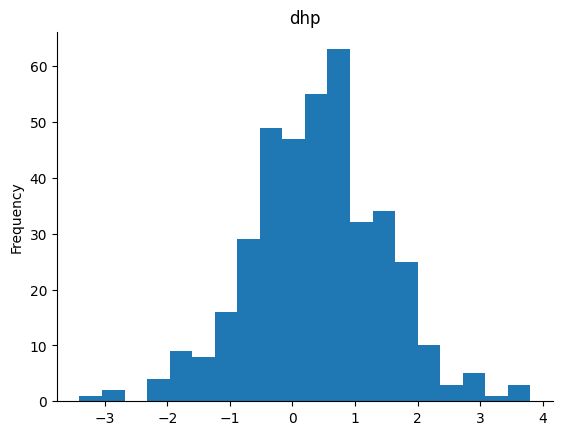

In [4]:
# @title dhp

from matplotlib import pyplot as plt
house['dhp'].plot(kind='hist', bins=20, title='dhp')
plt.gca().spines[['top', 'right',]].set_visible(False)

Let's first chart these two columns

In [5]:
fig1 = px.line(house, x=house.index, y="Average House Price", title='Average house price over time')
fig1.show()

In [6]:
fig2 = px.line(house, x=house.index, y="dhp", title='House price percentage change')
fig2.show()

ACF and PACF

In [ ]:
acf = smt.acf(house['dhp'],nlags=12)
pacf = smt.pacf(house['dhp'],nlags=12)

correlogram = pd.DataFrame({'acf':acf[1:], 'pacf':pacf[1:]})

correlogram

# Hard to really tell what to do based on these responses

Information criterion

In [ ]:
# We can check a given specification to see if it works

res = smt.ARIMA(house['dhp'], order=(1,0,1)).fit() # ARMA(1,1) here, ignore the middle digit
print(res.summary())

# Hard to interpret this just by itself, so better to use a grid search process

In [ ]:
# ARMA grid search process

res_grid = smt.arma_order_select_ic(house['dhp'], max_ar=5, max_ma=5, ic=['aic', 'bic'])

print('AIC')
print(res_grid.aic)
print('BIC')
print(res_grid.bic)

print(res_grid.aic_min_order)
print(res_grid.bic_min_order)

# 1.3. The fundamentals of forecasting using ARMA models

In [ ]:
# first - what is the current end of our dataset?

house.tail()

In [ ]:
# Now we estimate our model - BIC above said that our model is ARMA(2,0) so we'll use that

model_20 = smt.ARIMA(house['dhp'], order=(2,0,0))
res_20 = model_20.fit()
print(res_20.summary())


Two types of useful forecasts
- static
- dynamic

Dynamic forecasts calculate multi-step forecasts starting from the first period in the forecast sample.

Static forecasts imply a sequence of one-step-ahead forecasts, rolling the sample forwards one observation after each forecast.

It's simple to switch between the two in Python

In [ ]:
# Static

model_all = smt.ARIMA(house['dhp'], order=(2,0,0))
res_all = model_all.fit()

predict_res = res_all.predict('2024-01-01','2024-12-01',dynamic=False);
print(predict_res)
predict_res.plot()

In [ ]:
# Dynamic

predict_res = res_all.predict('2024-01-01','2024-12-01',dynamic=True);
print(predict_res)
predict_res.plot()

In [ ]:
# Check the accuracy of the forecast:

def rmse(pred, target):
    return np.sqrt(((pred - target) ** 2).mean())

house_outsample = house['2012-06-01':'2013-05-01']

pred1 = res_all.predict('2012-06-01','2013-05-01',dynamic=False)
stats1 = rmse(pred1, house_outsample['dhp'])
print('root mean squared error, static: {}'.format(stats1))

pred2 = res_all.predict('2012-06-01','2013-05-01',dynamic=True)
stats2 = rmse(pred2, house_outsample['dhp'])
print('root mean squared error, dynamic: {}'.format(stats2))

house_outsample2 = house['2011-06-01':'2013-05-01']
pred3 = res_all.predict('2011-06-01','2013-05-01',dynamic=False)
stats3 = rmse(pred3, house_outsample2['dhp'])
print('root mean squared error, long: {}'.format(stats3))

# 1.4. Vector Autoregression

In [ ]:
# Get the new data - a currencies dataset

curr = pd.read_excel('/currencies.xls',index_col=[0])

def LogDiff(x):
    x_diff = 100*np.log(x/x.shift(1))
    x_diff = x_diff.dropna()
    return x_diff

curr = pd.DataFrame({'reur':LogDiff(curr['EUR']),
                     'rgbp':LogDiff(curr['GBP']),
                     'rjpy':LogDiff(curr['JPY'])})

curr.head()

In [ ]:
# Get an overview of the relationships

curr.corr()

In [ ]:
# Now lets run the VAR - for now, assume we know the appropriate lag length is 2

model = smt.VAR(curr)
res = model.fit(maxlags=2)
print(res.summary())


In [ ]:
# We can work out the appropriate lag length
# We'll test up to 10 lags

res = model.select_order(maxlags=10)
print(res.summary())

# look for the ****

In [ ]:
# We've already tried lag 2 (AIC, HQIC), lets do lag 1 (BIC)

model_1lag = smt.VAR(curr)
res_1lag = model_1lag.fit(maxlags=1)
print(res_1lag.summary())

In [ ]:
from statsmodels.tsa.stattools import grangercausalitytests

maxlag = 2    # determined by earlier tests

test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table
    are the P-Values. P-Values lesser than the significance level (0.05), implies
    the Null Hypothesis that the coefficients of the corresponding past values is
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

gc = grangers_causation_matrix(curr, variables = curr.columns)

gc

# If a given p-value is < significance level (0.05), then, the corresponding X series (column) causes the Y (row).

In [ ]:
curr.head()

In [ ]:
# Impulse response functions

model_ir = smt.VAR(curr)
res_ir = model_ir.fit(maxlags=1)

irf = res_ir.irf(20)
irf.plot();


# 1.7. GARCH

In [ ]:
# First we need to see how to detect ARCH effects in the data

data_arch = sm.add_constant(curr['rgbp'])
res_arch = sm.OLS(data_arch['rgbp'],data_arch['const']).fit()
print(res_arch.summary())


In [ ]:
from statsmodels.stats.diagnostic import het_arch
from statsmodels.compat import lzip


res = het_arch(res_arch.resid,nlags=5)
name = ['lm','lmpval','fval','fpval']
lzip(name,res)

# clear ARCH effects

In [ ]:
# Lets use a specialist module for ARCH

import sys
!{sys.executable} -m pip install arch

In [ ]:
from arch import arch_model

am = arch_model(curr['rjpy'], vol='GARCH')
res = am.fit()
print(res.summary())


In [ ]:
am = arch_model(curr['rjpy'], vol='EGARCH', o=1)
res = am.fit()
print(res.summary())

In [ ]:
# Let's finish by forecasting using GARCH

from arch import arch_model

# Create two data samples

data_in_the_sample = curr.loc[:'2012-06-05','rjpy']
data_out_of_the_sample = curr.loc['2012-06-06':,'rjpy']

# Static forecasting

am = arch_model(curr['rjpy'], vol='Garch')
cvar_rjpy_stat = {}
for date in data_out_of_the_sample.index:
    res = am.fit(last_obs = date, disp='off')
    forecasts = res.forecast(horizon=1)
    forecasts_res = forecasts.variance.dropna()
    cvar_rjpy_stat[date] = forecasts_res.iloc[1]
cvar_rjpy_stat = pd.DataFrame(cvar_rjpy_stat).T


# Dynamic forecasting

res = am.fit(last_obs = '2012-06-06', disp='off')
forecasts = res.forecast(horizon=len(data_out_of_the_sample))
forecasts_res = forecasts.variance.dropna()
cvar_rjpy_dyn = pd.DataFrame(data = forecasts_res.iloc[1].values,\
                             columns=['dynamic forecasting'],\
                             index=data_out_of_the_sample.index)


# Now chart

plt.figure(1)
plt.plot(cvar_rjpy_stat, label='static forecast')
plt.plot(cvar_rjpy_dyn, label='dynamic forecast')
plt.xlabel('Date')
plt.ylabel('Forecasts')
plt.legend()
plt.show()
